# 1 Нэг хэмжээст дата

In [23]:
import numpy as np
import pandas as pd
#jupyter Notebook дээр бутархайн эхний 3 оронго хэвлэнэ
%precision 3
#DataFrame дээр бутархайн эхний 3 оронг хэвлэнэ
pd.set_option('precision', 3)

In [17]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


Нэг сурагчид нэг 1 дүн оногдох нэг хэмжээст дата

нэгт: томёог Python хэлээр кодлох

хоёрт: Numpy болон Рandas сан ашиглах

In [4]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [5]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 1.1 Датаны төвийн үзүүлэлтүүд

### 1.1.1 арифметик дундаж (mean)

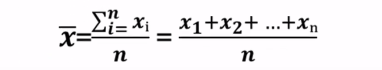

Дундажийг нь олох адилхан аргууд

In [6]:
sum(scores) / len(scores)

55.0

In [7]:
np.mean(scores)

55.0

In [11]:
scores_df.mean()
# Эхний 10 сурагчийн англи хэлний дүнгийн дундаж

score    55.0
dtype: float64

### 1.1.2 голч утга (median)

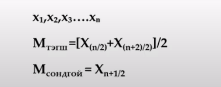

In [9]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [12]:
# ooroo tomyolj oloh
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [14]:
np.median(scores)

56.500

In [13]:
scores_df.median()
# эхний 10 сурагчийн англи хэлний дүнгийн голч утга

score    56.5
dtype: float64

### 1.1.3 mode

хамгийн их давтагдаж байгаа утга


In [14]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [15]:
scores_df.mode()

,score
0,65


## 1.2 датаны тархалтын үзүүлэлтүүд

                          english scores
                  A class                     B class
              бүгд = 50 оноо          50% - 0 оноо, 50% - 100 оноо 
mean               50 оноо                     50оноо          
median             50 оноо                     50 оноо


үр дүн яагаад адилхан байсан бэ?

Тархалтыг олох эхний алхам хазайлтыг олох байдаг.

### 1.2.1 вариац ба стандарт хазайлт

#### 1.2.1.1 хазайлт

Өгөгдөл тус бүрийн арифметик дундажаас хэр хазайсныг нь хазайлт гэдэг

In [19]:
mean = np.mean(scores)
deviation = scores - mean
deviation
# хазайлтын үзүүлэлтүүд
# ангил хэлний дүнгийн хувьд эхний 10 сурагч 
# эхний сурагч нь дундажаасаа 13 оноогоор бага оноо авсан байна.

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [20]:
# харицуулах дата
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_mean

55.0

In [21]:
# another_mean ийн хазайлтыг нь олохын тулд оноо тус бүрээс дундажийг нь хасна
another_deviation = another_scores - another_mean
another_deviation
# эхний 10 хүүхэдийн хазайлтын оноотой харьцуулахад хазайлт нь илүү нягтаршилтай байна.

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [22]:
np.mean(deviation)

0.0

In [24]:
np.mean(another_deviation)

0.0

In [26]:
# хазайлтын утгуудыг нэг багана болгон дата-н дээрээ нэмж өгье.
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [27]:
# хазайлтуудын дундаж үргэлж тэг гараад байдаг учир ашиглагддаггүй.
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 1.2.1.2 вариац (variance)

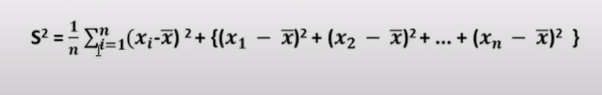

In [36]:
np.mean(deviation ** 2)

86.0

In [29]:
np.var(scores)

86.0

In [34]:
scores_df.var()
# Яагаад өөр байна вэ?
# numpy болон pandas сан нь өөр аргаар тооцоолол хийдэг
# sample variance ба unbiased variance гэж 2 төрөл байдаг 
# np сангийн үндсэн тохиргоо нь sample variance аргаар тооцоологддог
# хэрвээ pandas сангаар sample variance -ийг тодорхойлохийг хүсэххийн бол ингэж параметр олгоно.
# scores_df.var(ddof = 0)
# sample variance - аар голдуу хэрэглэгдэнэ.

score    95.556
dtype: float64

In [35]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [ ]:
summary_df.mean()
# sample variance - аар вариац-ыг тооцохдоо дундажаас хазайх хазайлтуудыг квадрат зэрэгт дэвшүүлэн 
# түүний дундажаар тооцоолдог
# тиймээс вариацийг талбайн дундаж гэж үзнэ дүрслэх тохиолдол байдаг 
# яагаад гэвэл хазайлтыг квадрат нь нэг талын урт нь хазайлттай тэнцүү 
# квдрат дөрвөлжингийн талбай юм. 

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [ ]:
np.var(another_deviation)

11.0

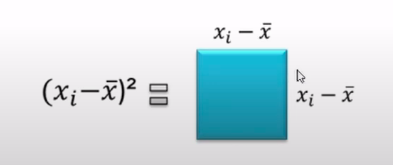

**Эхний 10 сурагчийн англи хэлний шалгалтын онооны үзүүлэлтүүд**

**Дундаж-55 оноо**

**Вариац-86 оноо квадрат**

#### стандарт хазайлт

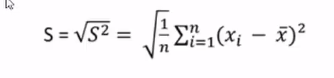

In [37]:
np.sqrt(np.var(scores))

9.273618495495704

In [38]:
np.std(scores)
# англи хэлний хичээлийн стандарт хазайлт

9.273618495495704

### Range ба квартил

#### Range

хамгийн их ба бага утгаар тархалтыг илэрхийлэх арга юм 
зөрүү их бол их хүрээнд тархасан бага бол бага хүрээнд тархснйыг илэрхийлдэг

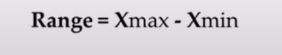

In [39]:
np.max(scores) - np.min(scores)

28

#### interquartile range

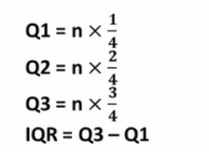

In [41]:
# вариац нь арифметик дундажаар тодорхойлох тархалтын хэмжигдэхүүн бол 
# quartile - ийн хүрээ нь median- аар тодорхойлогдох тархалтын талбайн хэмжигдэхүүн юм.
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### датаны тойм статистик

In [42]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## Normalization of data

датаг нормалчиллах

шалгалт1: 60 (mean=30)

шалгалт2 : 60 (mean=90)

### standardization

датанаас дундажийг хассан стандарт хазайлтад хуваахыг стандартчилал гэнэ.

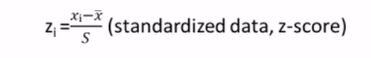

In [47]:
# cтандартчилагдсан дата, эсвэл z-score гэж нэрлэнэ.
z = (scores-np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [51]:
# эндээс стандарчилна гэдэг нь дундажийг 0 стандарт хазайлтыг 1 болгоно 
# 1 үзүүлэлт рүү хувиргахыг хэлдэг.
# ингэж ижил стандартад оруулснаар датаны байршилын харьцангүй хамааралаар дата тус бүрийг ойлгож болно.
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

### Deviation value

хазайлтыг утга: арифметик дундажийг 50 стандарт хазайлтыг 10 болгохын тулд стандартчилсан утгыг хэлнэ.

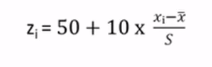

In [52]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [54]:
scores_df['deviation value'] = z
scores_df
# эндээс харахад c, e, j нар дундаж оноо авсан бол
# a сурагч бол дундаас нилээн бага b сургач бол дундаас дээгүүр оноо авсан харагдаж байна

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


Ингэж нормалчилсанаар дундаж эсвэл вариацаар хамаарахгүйгээр датаны байршилын харьцангүй хамааралыг мэдэж болох хэмжүүрээс стандарчилал ба хазайлтын утга авч үзлээ

## Visualization of data

In [60]:
# нийт сурагчийн хувьд авч үзий.
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### Frequency distribution table

датаны тарацыг нарийн мэдэхийн тулд датаны утгыг хэд хэдэн завсарт хуваана завсар тус бүрт хэдэн датаг орж байгааг тоолдог арга нь Frequency distribution table гэдэг.

Өөрөөр хэлбэл завсар ба датаны тоог хүснэгтээр нэгтгэхыг хэлдэг.

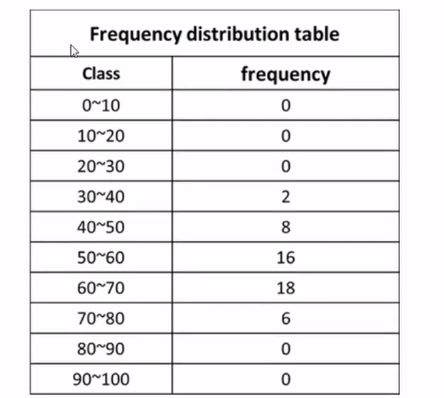

In [62]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [63]:
# 0~10, 10~20, ... Гэж нэрлэгдсэн мөрүүдийн жагсаалтыг үүсгээрэй
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class-г индексээр DataFrame үүсгэ
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [65]:
# классын медиан утга олдог 
# жишээн table - дээрхиэс 60-70 классын утга нь 65 болно.
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [66]:
# нийт датанаас тухайн классын дата хэд орчим хувийг эзэлж байгааг харна.
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [67]:
# тухайг класс хүртэл relative frequency хуримтлагдсан нийлбэрээр илэрхийлэгддэг.
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [68]:
# бүгдийн нэгтгээд харий
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### Mode review

датаны хамгийн их утга

жишээн нь: class - ын өргөнийг 4 оноо болгон тархалтын давтамжийн хүснэгтийг байгуулвал моод нь 66 болно.

In [69]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### Histogram

In [70]:
# Matplotlib-н pyplot тоделыг plt гэсэн нэрээр дуудна
import matplotlib.pyplot as plt

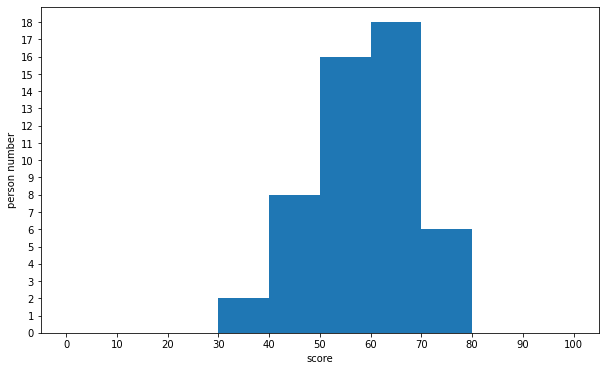

In [71]:
fig = plt.figure(figsize=(10, 6))
# 1 × 1 талбайг тодорхойлж, талбайг нэг хэсэгт зурсан гэсэн үг юм.
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

ax.set_xlabel('score')

ax.set_ylabel('person number')
# X тэнхлэгийг 0, 10, 20, ..., 100 хуваарьт хуваана
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y тэнхлэгийг 0, 1, 2, ... гэж хуваадаг.
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

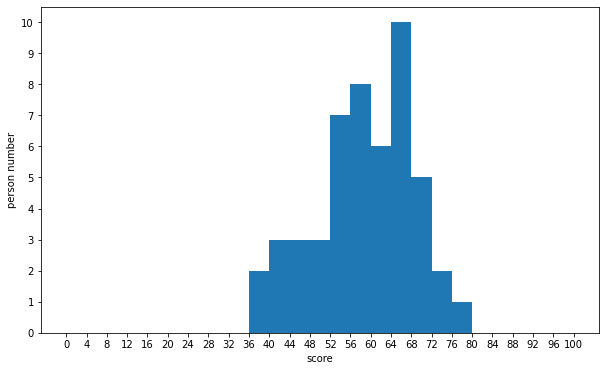

In [72]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# классын тоог 25 болгоод харвал
freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

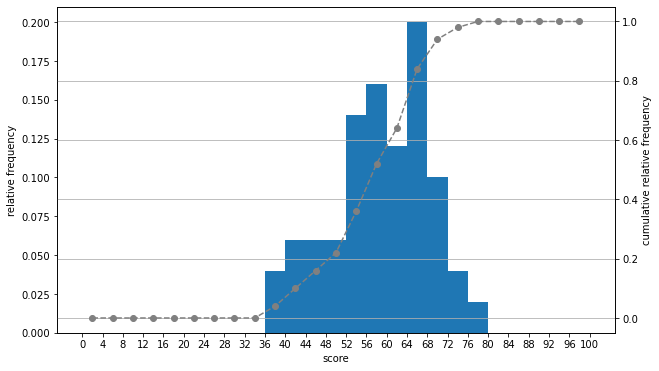

In [74]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()


weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

#ls аргументыг '--' гэж тохируу тасархай шугамыг зурна
# marker -г 'o'гэж тохируулан датаг цэгээр дүрслэнэ.
# Хэрэв аргументийн өнгийг 'gray' гэж тохируулсан бол саарлаар дүрслэгднэ.
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')

ax2.grid()

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()
# тухайн класс хүртэл харьцангүй давтамжын хуримтлагдсан нийлбэр дүрслэгдэж байна.

### Box plot

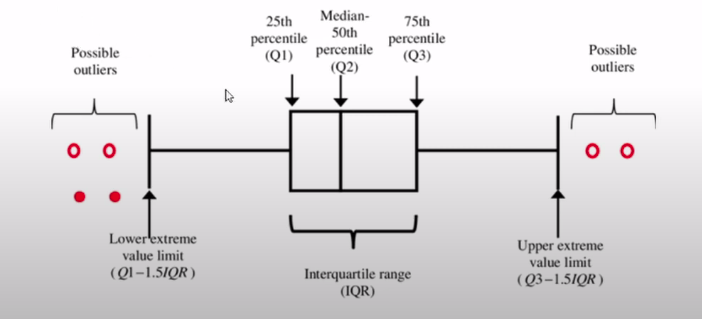

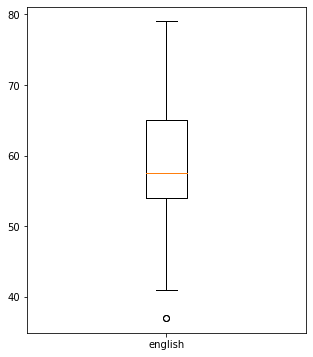

In [75]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()